## Worgroup 5 - Grupo 6 :

- <a href='#1.0'> 1. Plot </a> 
- <a href='#1.1'> 2. Regex </a> 

In [6]:
#importamos nuestras librerías
import pandas as pd
import numpy as np
import warnings
import os
import pyreadstat

import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D

warnings.filterwarnings('ignore') 



## <a id='1.0'> 1. Plot </a> 

In [7]:
#Leer el excel
data_plot = pd.read_excel("../../data/produccion_coca/6.1.1_-_Illicit_coca_bush_cultivation.xlsx")
data_plot

,"Global illicit cultivation of coca bush, 2009-2020 (hectares)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2009-01-04 00:00:00,2010-01-04 00:00:00,2011-01-04 00:00:00,2012-01-04 00:00:00,2013-01-05 00:00:00,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bolivia (Plurinational State of),30900,31000,27200,25300,23000,20400.0,20200.0,23100.0,24500.0,23100.0,25500.0,29400.0
4,Colombia a,73000,62000,64000,48000,48000,69000.0,96000.0,146000.0,171000.0,169000.0,154000.0,142800.0
5,Peru b,59900,61200,62500,60400,49800,42900.0,40300.0,43900.0,49900.0,54100.0,54700.0,61800.0
6,Total,163800,154200,153700,133700,120800,132300.0,156500.0,213000.0,245400.0,246200.0,234200.0,234200.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Sources: Plurinational State of Bolivia: natio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,a) Net area on 31 December.\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#usamos el método iloc para seleccionar las filas y columnas deseadas del dataframe
refer = data_plot.iloc[3:6, 1:].copy()
#se utiliza el método T para transponer el dataframe y rename() para cambiar los nombres de las columnas.
refer = refer.T.rename(columns={3: "Bolivia", 4: "Colombia", 5: "Peru"})
refer['year'] = pd.to_datetime(range(2009, 2021), format='%Y')
refer.reset_index(drop=True, inplace=True)
refer



,Bolivia,Colombia,Peru,year
0,30900,73000,59900,2009-01-01
1,31000,62000,61200,2010-01-01
2,27200,64000,62500,2011-01-01
3,25300,48000,60400,2012-01-01
4,23000,48000,49800,2013-01-01
5,20400.0,69000.0,42900.0,2014-01-01
6,20200.0,96000.0,40300.0,2015-01-01
7,23100.0,146000.0,43900.0,2016-01-01
8,24500.0,171000.0,49900.0,2017-01-01
9,23100.0,169000.0,54100.0,2018-01-01


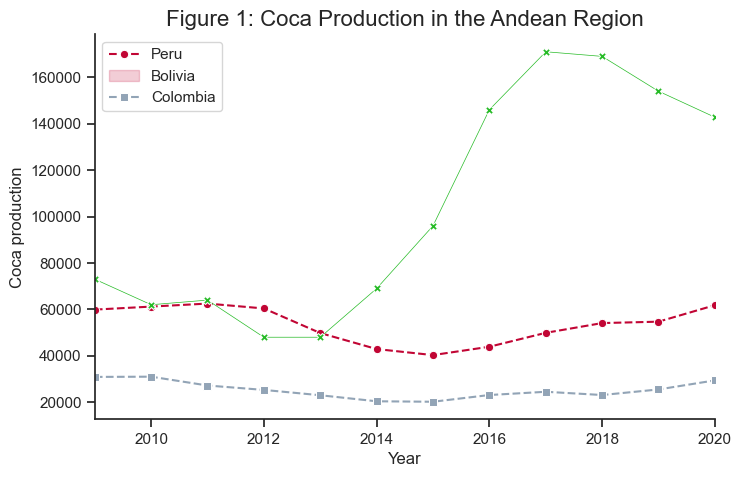

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x="year", y="Peru", data=datos, color="#c10534", marker="o", legend=False, linestyle='--')
sns.lineplot(x="year", y="Bolivia", data=datos, color="#92a4b6", marker="s", legend=False, linestyle='--')
sns.lineplot(x="year", y="Colombia", data=datos, color="#26bb26", marker="X", legend=False, linewidth=0.5)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.margins(x=0)

plt.xlabel('Year')
plt.ylabel('Coca production')
plt.title("Figure 1: Coca Production in the Andean Region", size=16)

# Leyenda
plt.legend(labels=["Peru", "Bolivia", "Colombia"])

plt.show()


### Erradicación de hectáreas de hoja de Coca

In [3]:
#Leer el excel
xlsx = pd.read_excel("../../data/produccion_coca/6.1.2_-_Eradication_of_coca_bush.xlsx")
xlsx

,Unnamed: 0,Unnamed: 1,"Reported eradication of coca bush, 2009-2020",Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,NaN,NaN,Method of eradication,Unit,2009.00,2010.00,2011.00,2012.00,2013.000,2014.0000,2015.000,2016.0,2017.00,2018.00,2019.00,2020.00,source 2020
1,NaN,NaN,Bolivia (Plurinational State of),manual,hectare,6341.00,8200.00,10509.00,11044.00,11407.000,11144.0000,11020.000,6577.0,7237.00,11174.00,9205.00,2177.00,https://www.unodc.org/documents/crop-monitorin...
2,NaN,NaN,Colombia,manual,hectare,165336.95,145743.69,138503.23,131004.75,69173.469,67234.5178,49967.463,17642.0,52000.67,59977.95,94606.00,130147.33,ARQ2020
3,NaN,NaN,Peru,manual,hectare,10025.00,12033.00,10290.00,14171.00,23785.000,31206.0000,35868.000,30151.0,25784.00,25106.67,25526.31,6272.80,ARQ2020
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,Source: United Nations Office on Drugs and Cri...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Nos quedamos solo con las columnas y filas con datos de los países.
bbdd= xlsx.loc[[1,2,3],:]
bbdd= bbdd.iloc[:, 5:17]

#Transponemos la dataframe para luego poner una columna con los años (en formato fecha)
bbdd= bbdd.transpose()
bbdd= bbdd.rename(columns = {1:"Bolivia", 2:"Colombia", 3:"Peru"})
bbdd['year'] = pd.to_datetime(range(2009, 2021), format='%Y')
bbdd.reset_index(drop = True, inplace = True)
bbdd

,Bolivia,Colombia,Peru,year
0,6341.0,165336.9500,10025.00,2009-01-01
1,8200.0,145743.6900,12033.00,2010-01-01
2,10509.0,138503.2300,10290.00,2011-01-01
3,11044.0,131004.7500,14171.00,2012-01-01
4,11407.0,69173.4690,23785.00,2013-01-01
5,11144.0,67234.5178,31206.00,2014-01-01
6,11020.0,49967.4630,35868.00,2015-01-01
7,6577.0,17642.0000,30151.00,2016-01-01
8,7237.0,52000.6700,25784.00,2017-01-01
9,11174.0,59977.9500,25106.67,2018-01-01


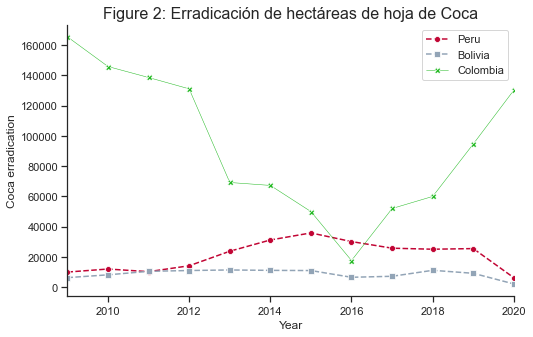

In [12]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x= "year" , y= "Peru", data = bbdd, color="#c10534", marker = "o", legend=False, linestyle='--')
sns.lineplot(x= "year" , y= "Bolivia", data = bbdd, color="#92a4b6", marker = "s", legend=False, linestyle = '--')
sns.lineplot(x= "year" , y= "Colombia", data = bbdd, color="#26bb26", marker = "X", legend=False, linewidth = 0.5)

ax.set_xmargin(0)  # drop espacios vacios right, left 
plt.xlabel('Year')
plt.ylabel('Coca erradication')
plt.title("Figure 2: Erradicación de hectáreas de hoja de Coca", size = 16)

#Leyenda
plt.legend( labels = ["Peru", "Bolivia", "Colombia"])

### Producción y erradicación de hoja de coca en el Perú

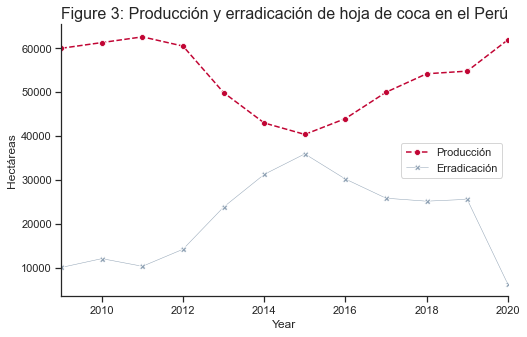

In [20]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x= "year" , y= "Peru", data = datos, color="#c10534", marker = "o", legend=False, linestyle='--')
sns.lineplot(x= "year" , y= "Peru", data = bbdd, color="#92a4b6", marker = "X", legend=False, linewidth = 0.5)

ax.set_xmargin(0)  # drop espacios vacios right, left 
plt.xlabel('Year')
plt.ylabel('Hectáreas')
plt.title("Figure 3: Producción y erradicación de hoja de coca en el Perú", size = 16)

#Leyenda
plt.legend( labels = ["Producción", "Erradicación"])

## Parte 2

### Metropolitano

### Estudiantes 

In [7]:
# Subiendo la base de datos
data = pd.read_excel("../../data/estudiantes/base_students.xlsx")
# Visualizando los datos
data

,NAME,BORN_DATE,AGE,TYPE_ADM_SCHOOL,GENDER,MAIL,DNI_NUMBER,observaciones
0,JOAN AYALA FERRERAS --- =9,"23 /08/1998 ""#%",!#10,publico,M ALEE,albatros001@wandoo.es,dni padre: 04-156597865,nombre correcto es Roberto daga rios
1,JOAN 3 BAEZ TEJADO,22/02/2004 !,15,privade,mal,albert@intercom.es,dni padre: 02-156597865,NaN
2,MARC BASTARDES SOTO -,05 /01/1998,****14,public0,malllle,alien_10@intercom.es,01-156597872,edad correta es 15
3,JOSEP ANGUERA VILAFRANCA,21/02/1999,16,public,mal ee,amores@hotmail.com,dni madre 01-156597872,NaN
4,JOAN ANDREU CRUZ /,27/06/1982 00:00,15,public,m al,anabel@altecom.es,01-156597872,NaN
5,JORDI RAYA 73738 )= GAVILAN,15/06/1991,17,publico,maleeee,antig56a@minorisa.es,dni padre: 01-156597865,"Beneficiado del programa Juntos, tiene 4 hermanos"
6,********** ARAN ALVAREZ FERNÁNDEZ,03/09 /1993,!12,public,malllle,ballador_rios@hotmail.com,dni madre 01-156597872,NaN
7,JAVIER BENITEZ JOSE3,18/02/1975,11,public,malllle,balladora@altecom.es,dni madre 01-156597872,asiste a una II.EE de jornada completa
8,MARIO PASCUAL FLORES,14/11/1986 00:00,8,privde,malll le,barbilla@hotmail.com,dni madre 01-156597872,NaN
9,JESUS AYALA TORNÉ,16/08/1993,9,prvade,male,besugo13@minorisa.es,dni padre: 02-156597865,"nombre correcto es Jesus Mendieta Jimenez, asi..."


In [19]:
data = data.copy()

In [20]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'born_date', 'age', 'type_adm_school', 'gender', 'mail',
       'dni_number', 'observaciones'],
      dtype='object')

In [21]:
data['name']

0               JOAN AYALA FERRERAS --- =9
1                       JOAN 3 BAEZ TEJADO
2                    MARC BASTARDES SOTO -
3                 JOSEP ANGUERA VILAFRANCA
4                       JOAN ANDREU CRUZ /
5              JORDI RAYA 73738 )= GAVILAN
6        ********** ARAN ALVAREZ FERNÁNDEZ
7                     JAVIER BENITEZ JOSE3
8                     MARIO PASCUAL FLORES
9                        JESUS AYALA TORNÉ
10         GEMMA 234 >_ LISTAN FIGUERAS .0
11                   SILVIA RASERO GAVILAN
12                  ALBERT ARNALOT PUIG !2
13                   MARIA MOLINER GARRIDO
14             BERTA GALOBART .--56 GARCIA
15                BERTA LÓPEZ GARRIGASSAIT
16                    MIREIA SÁNCHEZ GÓMEZ
17                    GEMMA ALAVEDRA SUNYÉ
18             MARIA ISABEL ALIGUÉ BONVEHÍ
19                       TONI MAS FRANCH .
20                   ALEJANDRO ALOY COMPTE
21                 JOAN MARTÍ ASENSIO VEGA
22                 CARLOS ACUÑA TORT--{{++
23    DAVID

In [26]:
regex = re.compile('[^a-zA-Z\s]')

data['name'] = data['name'].apply(lambda x: regex.sub('',x).strip())
data['name']

0               JOAN AYALA FERRERAS
1                 JOAN  BAEZ TEJADO
2               MARC BASTARDES SOTO
3          JOSEP ANGUERA VILAFRANCA
4                  JOAN ANDREU CRUZ
5              JORDI RAYA   GAVILAN
6             ARAN ALVAREZ FERNNDEZ
7               JAVIER BENITEZ JOSE
8              MARIO PASCUAL FLORES
9                  JESUS AYALA TORN
10          GEMMA   LISTAN FIGUERAS
11            SILVIA RASERO GAVILAN
12              ALBERT ARNALOT PUIG
13            MARIA MOLINER GARRIDO
14           BERTA GALOBART  GARCIA
15          BERTA LPEZ GARRIGASSAIT
16               MIREIA SNCHEZ GMEZ
17              GEMMA ALAVEDRA SUNY
18        MARIA ISABEL ALIGU BONVEH
19                  TONI MAS FRANCH
20            ALEJANDRO ALOY COMPTE
21           JOAN MART ASENSIO VEGA
22                 CARLOS ACUA TORT
23             DAVID   ALGU TRANCHO
24          CRISTINA BADIA CASTILLO
25    JULIO ALBERTO  BENITEZ FLORES
26          CRISTINA ARISSA HERMOSO
27        JOS ANTONIO BARALD